In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('C:/Users/Pruthviraj/Downloads/house-prices-advanced-regression-techniques/train.csv')
test_df = pd.read_csv('C:/Users/Pruthviraj/Downloads/house-prices-advanced-regression-techniques/test.csv')
gen_sub_df = pd.read_csv('C:/Users/Pruthviraj/Downloads/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
#test_merged = pd.merge(test_df,gen_sub_df,on='Id')

In [4]:
df = pd.concat([train_df.drop('SalePrice', axis=1),test_df],ignore_index=True)

In [5]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
df.shape

(2919, 80)

In [7]:
df.isnull().sum().sum()

15707

<Axes: >

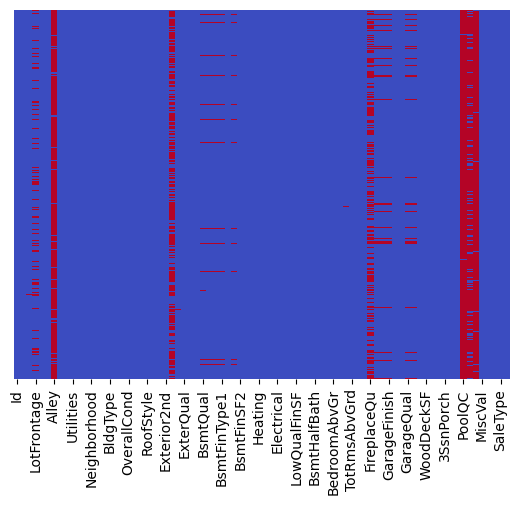

In [8]:
sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap='coolwarm')

In [9]:
df.drop(['Id'],axis=1,inplace=True)

In [10]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())

In [11]:
col =[]
for i in df.columns:
    num = df[i].isnull().sum()
    if(num>0):
        if(df[i].dtype=='int64' or df[i].dtype=='float64'):
            col.append(i)
            print(i,' :',num)

BsmtFinSF1  : 1
BsmtFinSF2  : 1
BsmtUnfSF  : 1
TotalBsmtSF  : 1
BsmtFullBath  : 2
BsmtHalfBath  : 2
GarageCars  : 1
GarageArea  : 1


In [12]:
for i in col:
    df[i] = df[i].fillna(df[i].mean())

In [13]:
for i in df.columns:
    num = df[i].isna().sum()
    if(num>600):
        df.drop(columns=i,inplace=True)
        print('Column Deleted:',i)

Column Deleted: Alley
Column Deleted: MasVnrType
Column Deleted: FireplaceQu
Column Deleted: PoolQC
Column Deleted: Fence
Column Deleted: MiscFeature


In [14]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

In [15]:
for i in df.columns:
    num = df[i].isna().sum()
    if num > 0:
        df[i] = imputer.fit_transform(df[[i]]).ravel()

In [16]:
df.isna().sum().sum()

0

In [17]:
str_col=[]
for i in df.columns:
    if(df[i].dtype=='object'):
        str_col.append(i)

In [18]:
# str_col

In [19]:
# sns.countplot(x='MSZoning',data=df,order=df['MSZoning'].value.counts().index)
# df['SaleCondition'].value_counts()
# sns.countplot(x='MSZoning', data=df)

In [20]:
for i in df.columns:
    if(df[i].dtype=='object'):
        min_frequency = 50
        title_counts = df[i].value_counts()
        df[i] = df[i].apply(lambda x: x if title_counts[x] >= min_frequency else 'Others')

In [21]:
df = pd.get_dummies(df, columns=str_col, drop_first=True)

In [22]:
df.shape

(2919, 162)

In [23]:
# plt.figure(figsize=(50, 60))
# correlation = df.corr()
# sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')

In [24]:
# li = []
# cnt =0
# lower_bound = -0.2
# upper_bound = 0.2
# for i in df.columns:
#     num =correlation['SalePrice'][i]
#     if(num>lower_bound and num<upper_bound):
#         cnt=cnt+1
#         df.drop(columns=i,inplace=True)
#         li.append(i)
#         print('COlumns Deleted:',i,'|| Corr_val:',num)

In [25]:
df.shape

(2919, 162)

In [26]:
X = df[:len(train_df)]
y = train_df['SalePrice']
X_test = df[len(train_df):]

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [28]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=42)

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [30]:
y_pred = model.predict(X_val)
y_pred_test = model.predict(X_test)

In [31]:
from sklearn.metrics import mean_absolute_error,accuracy_score,mean_squared_error,r2_score
mar = mean_absolute_error(y_val,y_pred)
mse = mean_squared_error(y_val,y_pred)
r2 = r2_score(y_val,y_pred,)
rmse = np.sqrt(mse)

In [32]:
print("mean_absolute_error: ",mar)
print("mean_squared_error: ",mse)
print("r2_score: ",r2)
print("Root mean squared error:",rmse)

mean_absolute_error:  17593.370068493154
mean_squared_error:  821249051.301115
r2_score:  0.892931665600923
Root mean squared error: 28657.443209419696


In [33]:
# Save test predictions to file
output = pd.DataFrame({'Id': test_df.Id, 'SalePrice': y_pred_test})
output.to_csv('submission.csv', index=False)